end_date is initialized to '2021-01-06'
end_date is initialized to '2021-01-06'
end_date is initialized to '2021-01-06'
end_date is initialized to '2021-01-06'


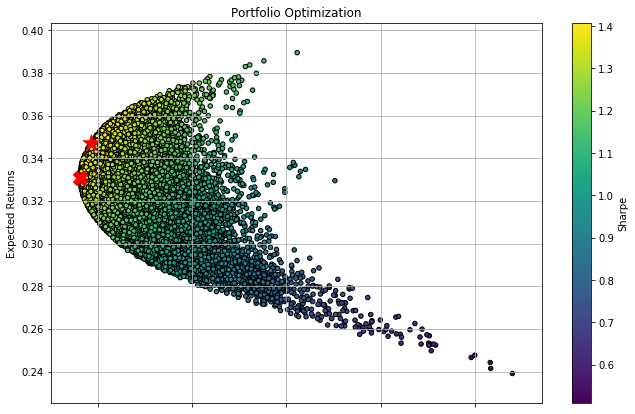

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('C:/Users/PPP/PycharmProjects/StockPriceAPI/Investar')
from Analyzer import MarketDB

mk = MarketDB()
stocks = ['삼성전자', '현대자동차', 'NAVER', '셀트리온']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2018-10-12')['close']
    
daily_ret = df.pct_change()    
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

port_ret = []
port_risk = []
port_weights = []
sharpe_ratio = []

for _ in range(20000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)
    
portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(stocks):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in stocks]]

max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]
min_risk = df.loc[df['Risk'] == df['Risk'].min()]

df.plot.scatter(x='Risk', y='Returns',c='Sharpe',cmap='viridis', edgecolors='k', figsize=(11,7), grid=True)
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r', marker='*', s=300)
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', marker='X', s=200)
plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [7]:
max_sharpe

,Returns,Risk,Sharpe,삼성전자,현대자동차,NAVER,셀트리온
17170,0.347358,0.246731,1.407842,0.478097,0.129688,0.348994,0.04322


In [8]:
min_risk

,Returns,Risk,Sharpe,삼성전자,현대자동차,NAVER,셀트리온
18083,0.330715,0.240698,1.373981,0.529397,0.129992,0.217006,0.123604
